# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys_booth import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:50]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city (Step 1)
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = requests.get(city_url).json()
        
        # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request

        # Step 5: Extraction
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        city_pressure = city_weather.get("main", {}).get("pressure") # lol booth extra bonus line

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Pressure": city_pressure,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass

    # sleep for 1 second
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | aasiaat
Processing Record 5 of Set 1 | st. paul
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | karratha
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | ruidoso
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | faya-largeau
Processing Record 13 of Set 1 | vallenar
Processing Record 14 of Set 1 | xinguara
Processing Record 15 of Set 1 | fort bragg
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | nadym
Processing Record 19 of Set 1 | rockland
Processing Record 20 of Set 1 | balkanabat
Processing Record 21 of Set 1 | kapa'a
Processing Record 22 of Set 1 | san pedro pochutla
Processing R

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          50
Lat           48
Lng           48
Max Temp      48
Humidity      48
Pressure      48
Cloudiness    48
Wind Speed    48
Country       48
Date          48
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,53.74,56.0,1033.0,66.0,8.95,SH,1.717108e+09
1,utrik,11.2278,169.8474,82.33,79.0,1013.0,100.0,10.58,MH,1.717108e+09
2,sitka,57.0531,-135.3300,53.49,58.0,1023.0,100.0,8.05,US,1.717108e+09
3,aasiaat,68.7098,-52.8699,30.34,67.0,1015.0,19.0,6.06,GL,1.717108e+09
4,st. paul,44.9444,-93.0933,78.58,43.0,1017.0,20.0,16.11,US,1.717108e+09


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_booth.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_booth.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,53.74,56.0,1033.0,66.0,8.95,SH,1.717108e+09
1,utrik,11.2278,169.8474,82.33,79.0,1013.0,100.0,10.58,MH,1.717108e+09
2,sitka,57.0531,-135.3300,53.49,58.0,1023.0,100.0,8.05,US,1.717108e+09
3,aasiaat,68.7098,-52.8699,30.34,67.0,1015.0,19.0,6.06,GL,1.717108e+09
4,st. paul,44.9444,-93.0933,78.58,43.0,1017.0,20.0,16.11,US,1.717108e+09


In [21]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        50 non-null     object 
 1   Lat         48 non-null     float64
 2   Lng         48 non-null     float64
 3   Max Temp    48 non-null     float64
 4   Humidity    48 non-null     float64
 5   Pressure    48 non-null     float64
 6   Cloudiness  48 non-null     float64
 7   Wind Speed  48 non-null     float64
 8   Country     48 non-null     object 
 9   Date        48 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.3+ KB


In [22]:
city_data_df.loc[pd.isnull(df.Lat)]

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
13,xinguara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,kulia village,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# drop na because I was so good at writing robust, not failing code
df = city_data_df.dropna(how="any").reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     48 non-null     int64  
 1   City        48 non-null     object 
 2   Lat         48 non-null     float64
 3   Lng         48 non-null     float64
 4   Max Temp    48 non-null     float64
 5   Humidity    48 non-null     float64
 6   Pressure    48 non-null     float64
 7   Cloudiness  48 non-null     float64
 8   Wind Speed  48 non-null     float64
 9   Country     48 non-null     object 
 10  Date        48 non-null     float64
dtypes: float64(8), int64(1), object(2)
memory usage: 4.2+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

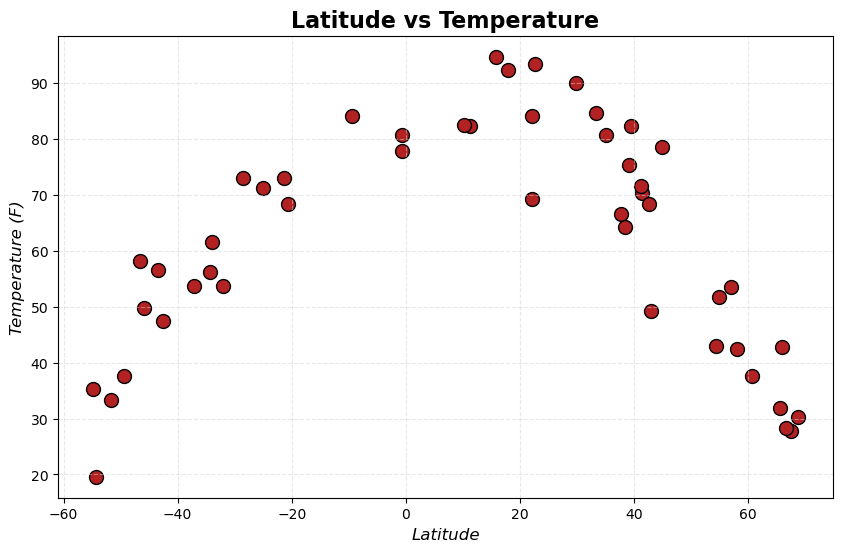

In [24]:
# Build scatter plot for latitude vs. temperature
# Step 1: Get the Data
x = df.Lat
y = df['Max Temp']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("../output_data/Fig1_PROF.png")
plt.show()

#### Latitude Vs. Humidity

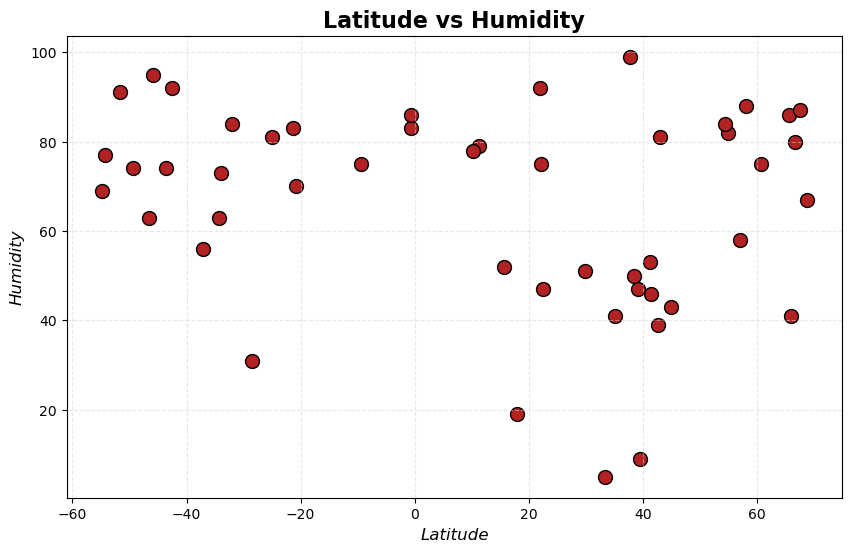

In [25]:
# Build the scatter plots for latitude vs. humidity
# Step 1: Get the Data
x = df.Lat
y = df.Humidity

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("../output_data/Fig2_PROF.png")
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots

def doRegression(x_value, y_values, x_title, y_title, annotation_pos):
    # USING LINREGRESS
    
    # makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # make the plot
    # Step 2: Make the canvas
    plt.figure(figsize=(10, 6))
    
    # Step 3: Make the basic plot
    plt.scatter(x_values, y_values, facecolor="firebrick", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit
    
    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
1,1,utrik,11.2278,169.8474,82.33,79.0,1013.0,100.0,10.58,MH,1.717108e+09
2,2,sitka,57.0531,-135.3300,53.49,58.0,1023.0,100.0,8.05,US,1.717108e+09
3,3,aasiaat,68.7098,-52.8699,30.34,67.0,1015.0,19.0,6.06,GL,1.717108e+09
4,4,st. paul,44.9444,-93.0933,78.58,43.0,1017.0,20.0,16.11,US,1.717108e+09
5,5,stanley,54.8680,-1.6985,51.71,82.0,1017.0,0.0,13.80,GB,1.717108e+09


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,0,edinburgh of the seven seas,-37.0676,-12.3116,53.74,56.0,1033.0,66.0,8.95,SH,1.717108e+09
6,6,karratha,-20.7377,116.8463,68.43,70.0,1016.0,0.0,10.29,AU,1.717108e+09
7,7,saint-pierre,-21.3393,55.4781,73.08,83.0,1019.0,75.0,23.02,RE,1.717108e+09
8,8,port-aux-francais,-49.3500,70.2167,37.69,74.0,1006.0,24.0,34.43,TF,1.717108e+09
10,10,adamstown,-25.0660,-130.1015,71.28,81.0,1014.0,52.0,20.38,PN,1.717108e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.8073615368126107


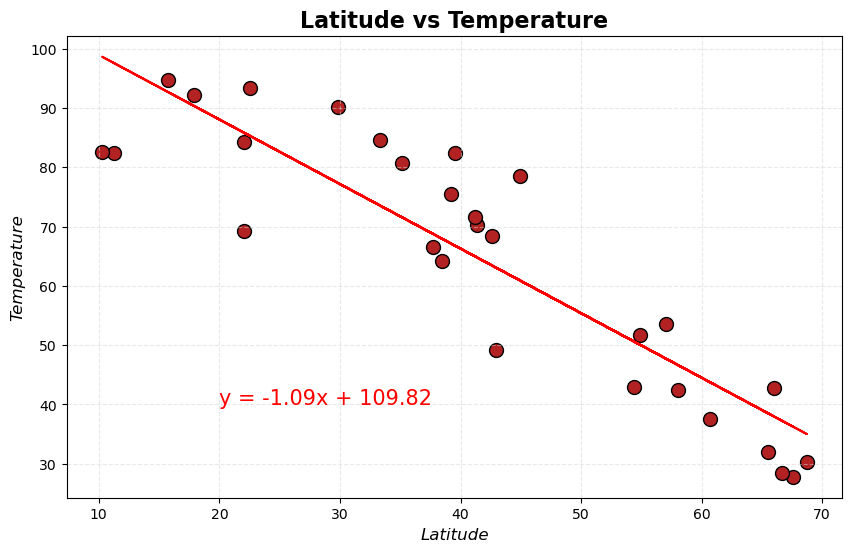

In [30]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (20,40))

The r-squared is: 0.8069964668990472


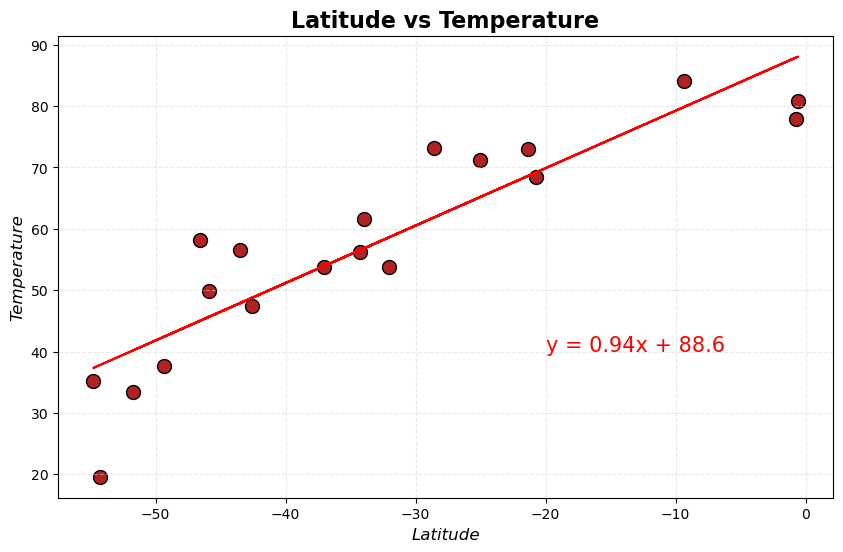

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (-20,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05337667594725728


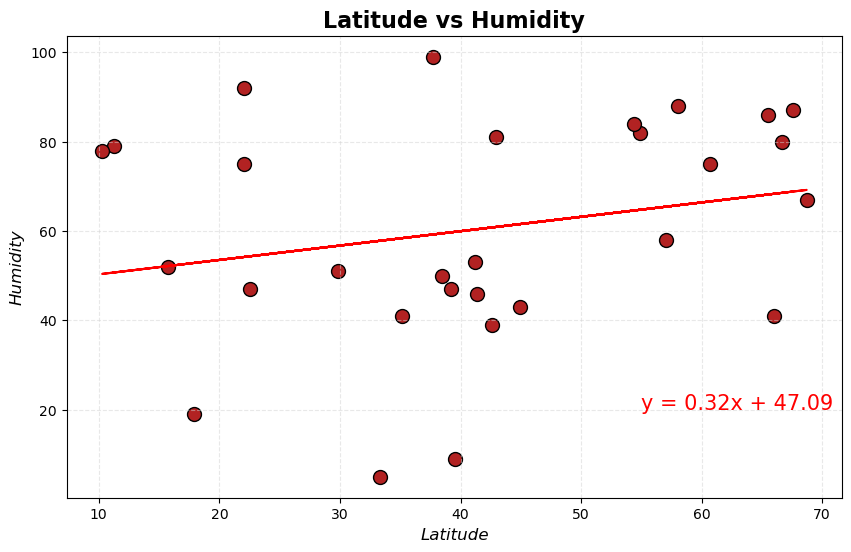

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (55,20))

The r-squared is: 0.0012290574541229597


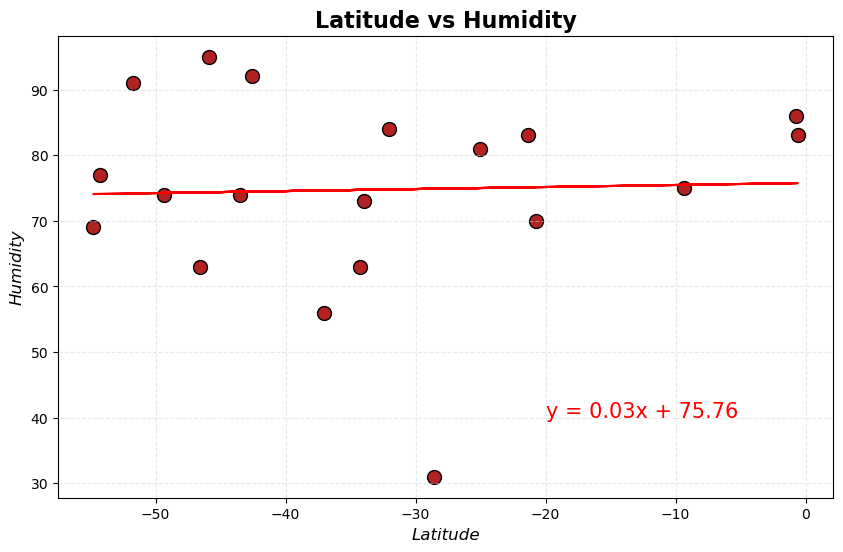

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (-20,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE